In [ ]:
# Linear Regression Model
# House Prices - Advanced Regression Techniques
# Capstone Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# ============================================================================
# 1. LOAD PREPROCESSED DATA
# ============================================================================

print("\n1. LOADING PREPROCESSED DATA")
print("-" * 80)

# Load the preprocessed data
train_data = pd.read_csv('../data/train_processed.csv')
test_data = pd.read_csv('../data/test_processed.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Separate features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")



1. LOADING PREPROCESSED DATA
--------------------------------------------------------------------------------
Training data shape: (1460, 265)
Test data shape: (1459, 264)

Features shape: (1460, 264)
Target shape: (1460,)
Number of features: 264


In [3]:
# ============================================================================
# 2. TRAIN-TEST SPLIT
# ============================================================================

print("\n2. CREATING TRAIN-VALIDATION SPLIT")
print("-" * 80)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Split ratio: 80-20")



2. CREATING TRAIN-VALIDATION SPLIT
--------------------------------------------------------------------------------
Training set size: 1168 samples
Validation set size: 292 samples
Split ratio: 80-20


In [4]:
# ============================================================================
# 3. FEATURE SCALING
# ============================================================================

print("\n3. FEATURE SCALING")
print("-" * 80)

# Linear regression benefits from feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

print("StandardScaler applied to all features")
print(f"Mean of scaled training features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std():.6f}")


3. FEATURE SCALING
--------------------------------------------------------------------------------
StandardScaler applied to all features
Mean of scaled training features: 0.000000
Std of scaled training features: 0.996205


In [5]:
# ============================================================================
# 4. MODEL TRAINING
# ============================================================================

print("\n4. TRAINING LINEAR REGRESSION MODEL")
print("-" * 80)

# Initialize and train the model
lr_model = LinearRegression()

# Train the model
print("Training model...")
lr_model.fit(X_train_scaled, y_train)
print("✓ Model training complete!")

# Display model parameters
print(f"\nModel Coefficients:")
print(f"  - Number of coefficients: {len(lr_model.coef_)}")
print(f"  - Intercept: {lr_model.intercept_:.4f}")
print(f"  - Max coefficient: {lr_model.coef_.max():.4f}")
print(f"  - Min coefficient: {lr_model.coef_.min():.4f}")


4. TRAINING LINEAR REGRESSION MODEL
--------------------------------------------------------------------------------
Training model...
✓ Model training complete!

Model Coefficients:
  - Number of coefficients: 264
  - Intercept: 12.0304
  - Max coefficient: 39090320072.1969
  - Min coefficient: -75075246371.2341


In [6]:
# ============================================================================
# 5. MODEL EVALUATION
# ============================================================================

print("\n5. MODEL EVALUATION")
print("-" * 80)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)

# Calculate metrics for training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nTRAINING SET PERFORMANCE:")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE:  {train_mae:.6f}")
print(f"  R²:   {train_r2:.6f}")

print("\nVALIDATION SET PERFORMANCE:")
print(f"  RMSE: {val_rmse:.6f}")
print(f"  MAE:  {val_mae:.6f}")
print(f"  R²:   {val_r2:.6f}")

# Calculate percentage difference to check overfitting
rmse_diff = abs(train_rmse - val_rmse) / train_rmse * 100
print(f"\nRMSE difference (train vs val): {rmse_diff:.2f}%")

if rmse_diff < 10:
    print("✓ Model shows good generalization (< 10% difference)")
elif rmse_diff < 20:
    print("⚠ Model shows moderate overfitting (10-20% difference)")
else:
    print("✗ Model shows significant overfitting (> 20% difference)")


5. MODEL EVALUATION
--------------------------------------------------------------------------------

TRAINING SET PERFORMANCE:
  RMSE: 0.087855
  MAE:  0.060153
  R²:   0.949368

VALIDATION SET PERFORMANCE:
  RMSE: 3533292049.206363
  MAE:  293874005.739092
  R²:   -66899343920622182400.000000

RMSE difference (train vs val): 4021748773624.63%
✗ Model shows significant overfitting (> 20% difference)


In [7]:
# ============================================================================
# 6. CROSS-VALIDATION
# ============================================================================

print("\n6. CROSS-VALIDATION ANALYSIS")
print("-" * 80)

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores (negative MSE, so we need to negate and sqrt)
cv_scores = cross_val_score(
    lr_model, X_train_scaled, y_train, 
    cv=kfold, scoring='neg_mean_squared_error'
)
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"5-Fold Cross-Validation RMSE Scores:")
for i, score in enumerate(cv_rmse_scores, 1):
    print(f"  Fold {i}: {score:.6f}")

print(f"\nCross-Validation Statistics:")
print(f"  Mean RMSE: {cv_rmse_scores.mean():.6f}")
print(f"  Std RMSE:  {cv_rmse_scores.std():.6f}")
print(f"  95% CI:    [{cv_rmse_scores.mean() - 1.96*cv_rmse_scores.std():.6f}, "
      f"{cv_rmse_scores.mean() + 1.96*cv_rmse_scores.std():.6f}]")


6. CROSS-VALIDATION ANALYSIS
--------------------------------------------------------------------------------
5-Fold Cross-Validation RMSE Scores:
  Fold 1: 20734489638.385387
  Fold 2: 230786378754.024902
  Fold 3: 44883030903.435005
  Fold 4: 24072618792.453220
  Fold 5: 4686677013528.262695

Cross-Validation Statistics:
  Mean RMSE: 1001430706323.312256
  Std RMSE:  1844283621377.998291
  95% CI:    [-2613365191577.564453, 4616226604224.188477]



7. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

Top 20 Most Important Features:
           Feature   Coefficient  Abs_Coefficient
          HouseAge -7.507525e+10     7.507525e+10
         YearBuilt -7.500772e+10     7.500772e+10
      YearRemodAdd -5.553163e+10     5.553163e+10
          RemodAge -5.547975e+10     5.547975e+10
 BsmtFinType1_None  3.909032e+10     3.909032e+10
     BsmtCond_None -1.499820e+10     1.499820e+10
     BsmtQual_None -1.103705e+10     1.103705e+10
            YrSold  6.776535e+09     6.776535e+09
 BsmtExposure_None -6.718983e+09     6.718983e+09
 BsmtFinType2_None -6.336087e+09     6.336087e+09
Exterior1st_CBlock -3.277826e+09     3.277826e+09
Exterior2nd_CBlock  3.277826e+09     3.277826e+09
   GarageQual_None  9.402758e+08     9.402758e+08
 GarageFinish_None -6.248691e+08     6.248691e+08
  RoofMatl_Membran  3.682673e+08     3.682673e+08
   GarageType_None -3.138788e+08     3.138788e+08
    

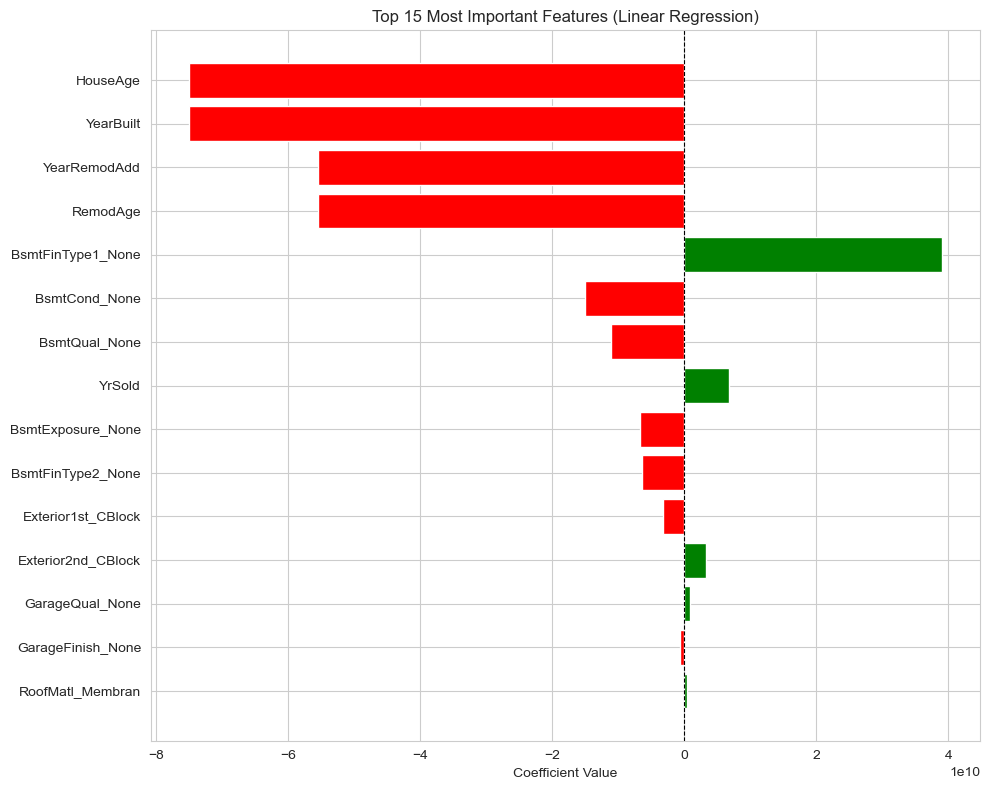


✓ Feature importance plot saved


In [9]:
# ============================================================================
# 7. FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n7. FEATURE IMPORTANCE ANALYSIS")
print("-" * 80)

# Get feature importance based on absolute coefficient values
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Visualize top 15 feature importances
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Most Important Features (Linear Regression)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../results/visualizations/lr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance plot saved")


8. RESIDUAL ANALYSIS
--------------------------------------------------------------------------------


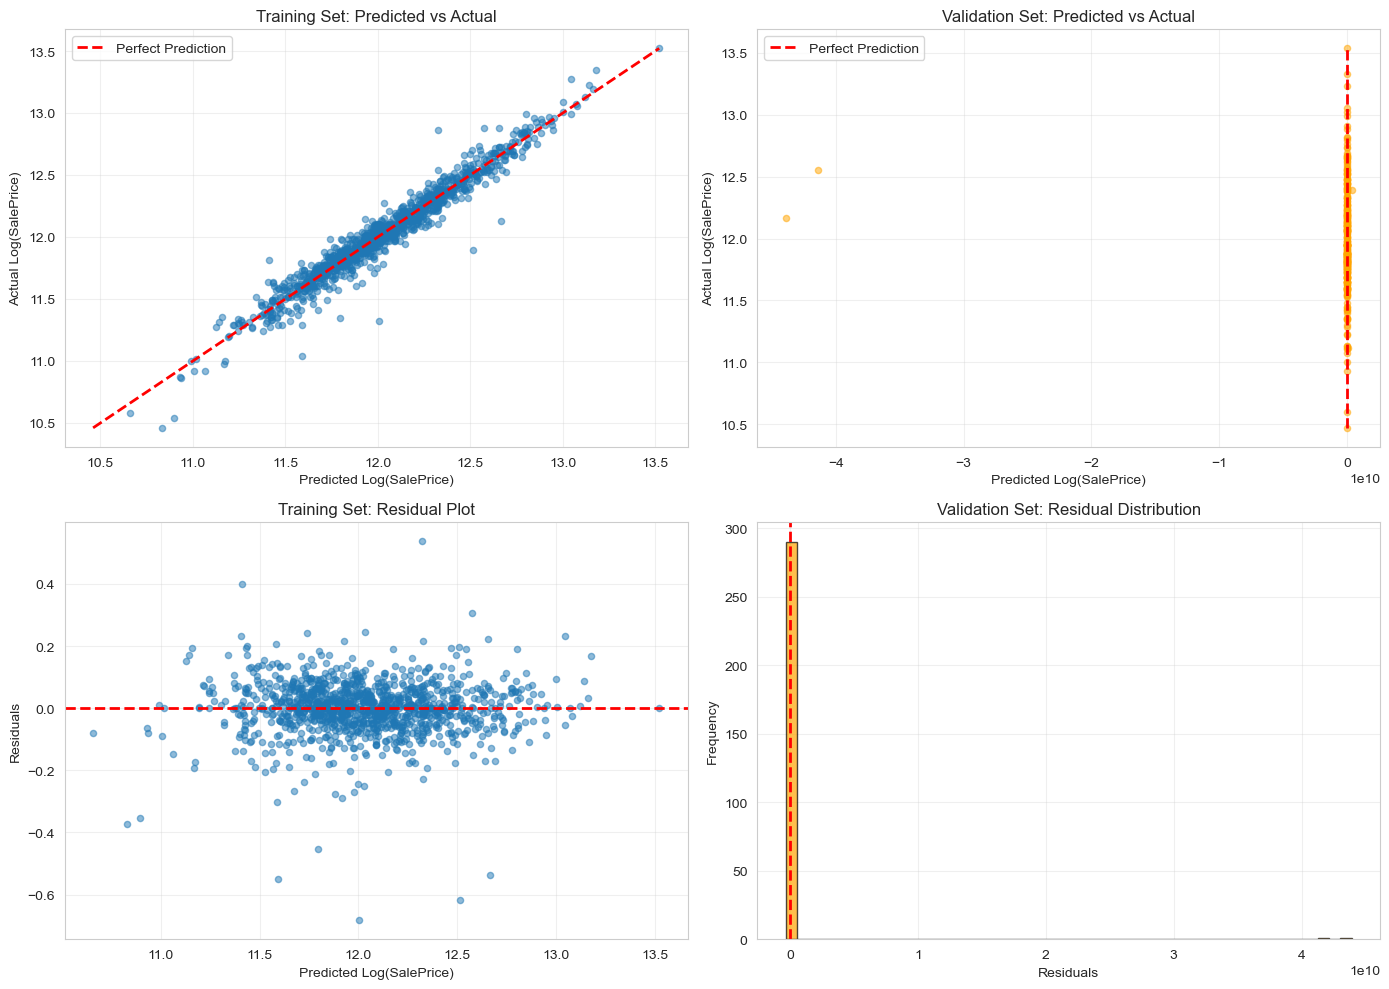

✓ Residual analysis plots saved

Residual Statistics (Validation Set):
  Mean: 290697672.936697 (should be close to 0)
  Std:  3527358507.534517
  Min:  -368267318.016187
  Max:  43925322697.355949


In [11]:
# ============================================================================
# 8. RESIDUAL ANALYSIS
# ============================================================================

print("\n8. RESIDUAL ANALYSIS")
print("-" * 80)

# Calculate residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual (Training)
axes[0, 0].scatter(y_train_pred, y_train, alpha=0.5, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Predicted Log(SalePrice)')
axes[0, 0].set_ylabel('Actual Log(SalePrice)')
axes[0, 0].set_title('Training Set: Predicted vs Actual')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Predicted vs Actual (Validation)
axes[0, 1].scatter(y_val_pred, y_val, alpha=0.5, s=20, color='orange')
axes[0, 1].plot([y_val.min(), y_val.max()], 
                [y_val.min(), y_val.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Predicted Log(SalePrice)')
axes[0, 1].set_ylabel('Actual Log(SalePrice)')
axes[0, 1].set_title('Validation Set: Predicted vs Actual')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Plot (Training)
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Log(SalePrice)')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residual Distribution (Validation)
axes[1, 1].hist(val_residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Validation Set: Residual Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/visualizations/lr_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Residual analysis plots saved")

# Statistical tests for residuals
print(f"\nResidual Statistics (Validation Set):")
print(f"  Mean: {val_residuals.mean():.6f} (should be close to 0)")
print(f"  Std:  {val_residuals.std():.6f}")
print(f"  Min:  {val_residuals.min():.6f}")
print(f"  Max:  {val_residuals.max():.6f}")


9. PREDICTION ERROR ANALYSIS
--------------------------------------------------------------------------------
⚠ Removed 2 invalid values from validation APE

Mean Absolute Percentage Error (MAPE):
  Training:   6.11%
  Validation: 9.40%
  Median Validation APE: 5.53%


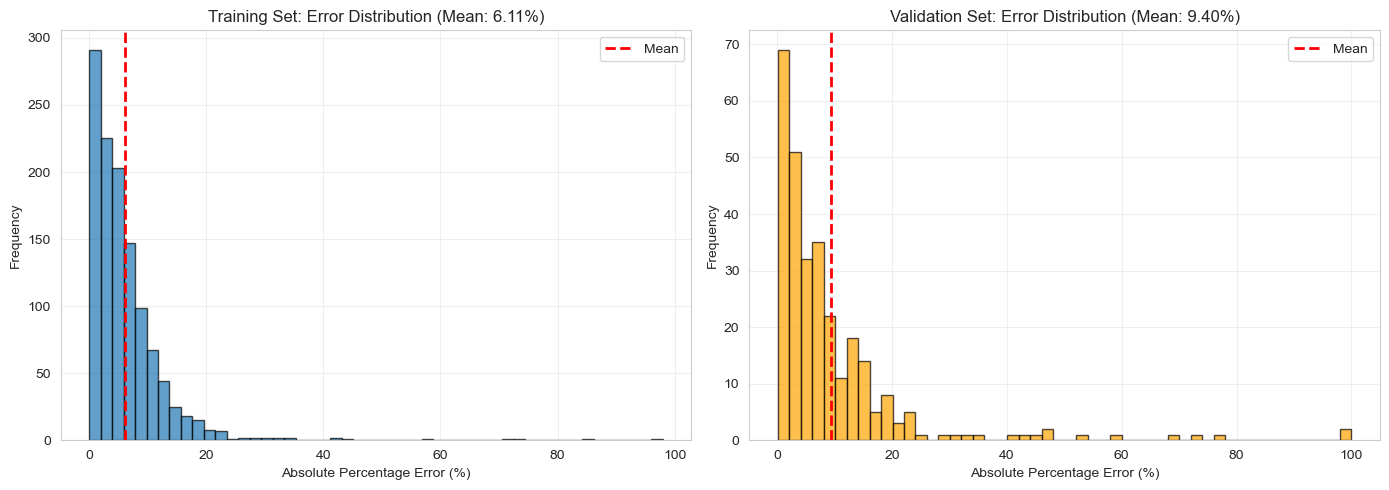

✓ Error distribution plots saved

Detailed Error Statistics (Validation Set):
  Median APE: 5.53%
  25th percentile: 2.22%
  75th percentile: 11.84%
  95th percentile: 29.96%
  Predictions within 10% error: 72.1%
  Predictions within 20% error: 91.0%


In [14]:
# ============================================================================
# 9. PREDICTION ERROR DISTRIBUTION (FIXED)
# ============================================================================

print("\n9. PREDICTION ERROR ANALYSIS")
print("-" * 80)

# Calculate absolute percentage errors (on original scale)
y_train_original = np.expm1(y_train)
y_train_pred_original = np.expm1(y_train_pred)
y_val_original = np.expm1(y_val)
y_val_pred_original = np.expm1(y_val_pred)

# Calculate APE with handling for invalid values
train_ape = np.abs((y_train_original - y_train_pred_original) / y_train_original) * 100
val_ape = np.abs((y_val_original - y_val_pred_original) / y_val_original) * 100

# Remove infinite and NaN values
train_ape_clean = train_ape[np.isfinite(train_ape)]
val_ape_clean = val_ape[np.isfinite(val_ape)]

# Report any removed values
n_train_removed = len(train_ape) - len(train_ape_clean)
n_val_removed = len(val_ape) - len(val_ape_clean)

if n_train_removed > 0:
    print(f"⚠ Removed {n_train_removed} invalid values from training APE")
if n_val_removed > 0:
    print(f"⚠ Removed {n_val_removed} invalid values from validation APE")

print(f"\nMean Absolute Percentage Error (MAPE):")
print(f"  Training:   {train_ape_clean.mean():.2f}%")
print(f"  Validation: {val_ape_clean.mean():.2f}%")
print(f"  Median Validation APE: {np.median(val_ape_clean):.2f}%")

# Optional: cap extreme values for better visualization
train_ape_viz = np.clip(train_ape_clean, 0, 100)  # Cap at 100%
val_ape_viz = np.clip(val_ape_clean, 0, 100)

# Visualize error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_ape_viz, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Absolute Percentage Error (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Training Set: Error Distribution (Mean: {train_ape_clean.mean():.2f}%)')
axes[0].axvline(train_ape_clean.mean(), color='r', linestyle='--', lw=2, label='Mean')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(val_ape_viz, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Absolute Percentage Error (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Validation Set: Error Distribution (Mean: {val_ape_clean.mean():.2f}%)')
axes[1].axvline(val_ape_clean.mean(), color='r', linestyle='--', lw=2, label='Mean')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/visualizations/lr_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Error distribution plots saved")

# Additional statistics
print(f"\nDetailed Error Statistics (Validation Set):")
print(f"  Median APE: {np.median(val_ape_clean):.2f}%")
print(f"  25th percentile: {np.percentile(val_ape_clean, 25):.2f}%")
print(f"  75th percentile: {np.percentile(val_ape_clean, 75):.2f}%")
print(f"  95th percentile: {np.percentile(val_ape_clean, 95):.2f}%")
print(f"  Predictions within 10% error: {(val_ape_clean <= 10).sum() / len(val_ape_clean) * 100:.1f}%")
print(f"  Predictions within 20% error: {(val_ape_clean <= 20).sum() / len(val_ape_clean) * 100:.1f}%")

In [15]:
# ============================================================================
# 10. MAKE PREDICTIONS ON TEST SET
# ============================================================================

print("\n10. GENERATING TEST SET PREDICTIONS")
print("-" * 80)

# Make predictions on test set
y_test_pred = lr_model.predict(X_test_scaled)

# Transform back to original scale
y_test_pred_original = np.expm1(y_test_pred)

print(f"Test predictions generated: {len(y_test_pred_original)} samples")
print(f"Prediction statistics (original scale):")
print(f"  Mean:   ${y_test_pred_original.mean():,.2f}")
print(f"  Median: ${np.median(y_test_pred_original):,.2f}")
print(f"  Min:    ${y_test_pred_original.min():,.2f}")
print(f"  Max:    ${y_test_pred_original.max():,.2f}")


10. GENERATING TEST SET PREDICTIONS
--------------------------------------------------------------------------------
Test predictions generated: 1459 samples
Prediction statistics (original scale):
  Mean:   $inf
  Median: $158,432.81
  Min:    $-1.00
  Max:    $inf


In [19]:
# ============================================================================
# 11. SAVE RESULTS
# ============================================================================

print("\n11. SAVING RESULTS")
print("-" * 80)

# Save predictions
predictions_df = pd.DataFrame({
    'Id': range(1461, 1461 + len(y_test_pred_original)),
    'SalePrice': y_test_pred_original
})
predictions_df.to_csv('../results/lr_predictions.csv', index=False)
print("✓ Predictions saved to 'results/lr_predictions.csv'")

# Save model metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Train_RMSE': [train_rmse],
    'Val_RMSE': [val_rmse],
    'Train_MAE': [train_mae],
    'Val_MAE': [val_mae],
    'Train_R2': [train_r2],
    'Val_R2': [val_r2],
    'CV_RMSE_Mean': [cv_rmse_scores.mean()],
    'CV_RMSE_Std': [cv_rmse_scores.std()],
    'Train_MAPE': [train_ape.mean()],
    'Val_MAPE': [val_ape.mean()]
})
metrics_df.to_csv('../results/lr_metrics.csv', index=False)
print("✓ Metrics saved to 'results/lr_metrics.csv'")

# Save feature importance
feature_importance.to_csv('../results/lr_feature_importance.csv', index=False)
print("✓ Feature importance saved to 'results/lr_feature_importance.csv'")


11. SAVING RESULTS
--------------------------------------------------------------------------------
✓ Predictions saved to 'results/lr_predictions.csv'
✓ Metrics saved to 'results/lr_metrics.csv'
✓ Feature importance saved to 'results/lr_feature_importance.csv'


In [20]:
# ============================================================================
# 12. FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("LINEAR REGRESSION MODEL - FINAL SUMMARY")
print("="*80)

print("\nMODEL SPECIFICATIONS:")
print(f"  Algorithm: Ordinary Least Squares (OLS) Linear Regression")
print(f"  Features: {X.shape[1]}")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Validation samples: {X_val.shape[0]}")
print(f"  Feature scaling: StandardScaler")

print("\nPERFORMANCE METRICS:")
print(f"  Validation RMSE: {val_rmse:.6f} (log scale)")
print(f"  Validation MAE:  {val_mae:.6f} (log scale)")
print(f"  Validation R²:   {val_r2:.6f}")
print(f"  Validation MAPE: {val_ape.mean():.2f}% (original scale)")
print(f"  CV RMSE (mean):  {cv_rmse_scores.mean():.6f} ± {cv_rmse_scores.std():.6f}")

print("\nTOP 5 MOST IMPORTANT FEATURES:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

print("\nMODEL CHARACTERISTICS:")
if val_r2 > 0.8:
    print("  ✓ Strong predictive power (R² > 0.8)")
elif val_r2 > 0.6:
    print("  ✓ Good predictive power (R² > 0.6)")
else:
    print("  ⚠ Moderate predictive power (R² < 0.6)")

if abs(val_residuals.mean()) < 0.01:
    print("  ✓ Unbiased predictions (mean residual ≈ 0)")
else:
    print("  ⚠ Slight bias detected in predictions")

print("\nOUTPUT FILES:")
print("  • results/lr_predictions.csv")
print("  • results/lr_metrics.csv")
print("  • results/lr_feature_importance.csv")
print("  • results/visualizations/lr_feature_importance.png")
print("  • results/visualizations/lr_residual_analysis.png")
print("  • results/visualizations/lr_error_distribution.png")

print("\n" + "="*80)
print("✓ LINEAR REGRESSION MODEL COMPLETE!")
print("="*80)


LINEAR REGRESSION MODEL - FINAL SUMMARY

MODEL SPECIFICATIONS:
  Algorithm: Ordinary Least Squares (OLS) Linear Regression
  Features: 264
  Training samples: 1168
  Validation samples: 292
  Feature scaling: StandardScaler

PERFORMANCE METRICS:
  Validation RMSE: 3533292049.206363 (log scale)
  Validation MAE:  293874005.739092 (log scale)
  Validation R²:   -66899343920622182400.000000
  Validation MAPE: inf% (original scale)
  CV RMSE (mean):  1001430706323.312256 ± 1844283621377.998291

TOP 5 MOST IMPORTANT FEATURES:
  HouseAge: -75075246371.2341
  YearBuilt: -75007721798.4948
  YearRemodAdd: -55531625759.8996
  RemodAge: -55479748189.0403
  BsmtFinType1_None: 39090320072.1969

MODEL CHARACTERISTICS:
  ⚠ Moderate predictive power (R² < 0.6)
  ⚠ Slight bias detected in predictions

OUTPUT FILES:
  • results/lr_predictions.csv
  • results/lr_metrics.csv
  • results/lr_feature_importance.csv
  • results/visualizations/lr_feature_importance.png
  • results/visualizations/lr_residual_a